In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('C://Users/meyissi/Desktop/supervised learning/data.csv')
prices = data['price']
features = data.drop('price', axis = 1)

print("This dataset has {} data points with {} variables each.".format(*data.shape)) 
data.shape

This dataset has 150000 data points with 14 variables each.


(150000, 14)

In [3]:
data

id_product  month   day    universe    category     subcategory  \
0            28833    5.0  19.0  universe_2  category_5  subcategory_10   
1            73453   11.0  26.0  universe_2  category_2   subcategory_9   
2           117457    6.0   2.0  universe_2  category_2   subcategory_9   
3           139349   10.0  14.0  universe_2  category_3  subcategory_14   
4            94666    2.0  11.0  universe_2  category_4   subcategory_4   
5            19200    1.0   9.0  universe_2  category_2   subcategory_9   
6            52054    6.0  21.0  universe_2  category_5   subcategory_2   
7            47823   10.0   4.0  universe_2  category_3   subcategory_6   
8             1006    4.0  12.0  universe_2  category_3  subcategory_11   
9           109237    4.0   3.0  universe_2  category_3  subcategory_23   
10          109528    7.0   1.0  universe_2  category_2   subcategory_5   
11           52058    9.0   2.0  universe_2  category_5   subcategory_1   
12          135436    9.0  21.0  universe_2  category_3   subcategory_7   
13           29668    2.0  14.0  universe_2  category_3  subcategory_16   
14            5229    5.0  29.0  universe_2  category_3   subcategory_7   
15          130765   11.0  26.0  universe_2  category_3   subcategory_7   
16           94922   11.0   3.0  universe_2  category_5   subcategory_1   
17          131197   10.0   4.0  universe_2  category_5  subcategory_10   
18           71700    1.0  27.0  universe_2  category_3   subcategory_7   
19           51669    9.0   8.0  universe_2  category_3  subcategory_16   
20          118439    6.0  26.0  universe_2  category_2   subcategory_9   
21           81046   12.0  20.0  universe_2  category_3   subcategory_6   
22          115447   11.0  30.0  universe_2  category_3   subcategory_7   
23          120131    7.0   7.0  universe_2  category_5  subcategory_10   
24          132157    9.0   3.0  universe_2  category_2   subcategory_9   
25             181   11.0  20.0  universe_2  category_3  subcategory_23   
26          139350   11.0  28.0  universe_2  category_3  subcategory_14   
27           79855    4.0   8.0  universe_2  category_5   subcategory_3   
28           42309    4.0  23.0  universe_2  category_3   subcategory_7   
29          121170   10.0  24.0  universe_2  category_3   subcategory_7   
...            ...    ...   ...         ...         ...             ...   
149970       46249    5.0  10.0  universe_1  category_5   subcategory_8   
149971      104128    3.0  10.0  universe_2  category_5   subcategory_2   
149972       16314    8.0  26.0  universe_2  category_3   subcategory_7   
149973         306    6.0  28.0  universe_2  category_5  subcategory_17   
149974       78161   11.0   6.0  universe_1  category_3  subcategory_12   
149975      114988    5.0  12.0  universe_2  category_3  subcategory_11   
149976       18898    2.0  25.0  universe_2  category_3   subcategory_7   
149977       52539    6.0  11.0  universe_2  category_5   subcategory_8   
149978       80358   11.0  19.0  universe_2  category_5   subcategory_1   
149979       40504   10.0   1.0  universe_2  category_3  subcategory_14   
149980        5801   10.0  10.0  universe_2  category_2   subcategory_5   
149981       22861    2.0  24.0  universe_2  category_3   subcategory_7   
149982       14489    3.0   5.0  universe_2  category_2   subcategory_9   
149983       41292    4.0  13.0  universe_2  category_3  subcategory_21   
149984       46153   11.0   2.0  universe_2  category_3   subcategory_7   
149985       46256    2.0  24.0  universe_2  category_3  subcategory_11   
149986       51062    9.0   5.0  universe_2  category_3  subcategory_13   
149987       69552   10.0   8.0  universe_2  category_3  subcategory_14   
149988       31474    5.0   9.0  universe_2  category_3  subcategory_21   
149989       25550    1.0  20.0  universe_2  category_5   subcategory_1   
149990       44234    7.0   1.0  universe_2  category_3   subcategory_7   
149991       46254   10.0   9.0  

In [4]:
data['years']='2020'
data['date']=pd.to_datetime(data[['years', 'month', 'day']])
data['universe'] = data['universe'].map(lambda x: x.lstrip('universe_'))
data['category'] = data['category'].map(lambda x: x.lstrip('category_'))
data['subcategory'] = data['subcategory'].map(lambda x: x.lstrip('subcategory_'))
data['material'] = data['material'].map(lambda x: x.lstrip('material_'))
data['condition'] = data['condition'].map(lambda x: x.lstrip('condition_'))
data['brand'] = data['brand'].map(lambda x: x.lstrip('brand_'))
data['colour'] = data['colour'].map(lambda x: x.lstrip('colour_'))
data

id_product  month   day universe category subcategory brand     model  \
0            28833    5.0  19.0        2        5          10    30       NaN   
1            73453   11.0  26.0        2        2           9    82       NaN   
2           117457    6.0   2.0        2        2           9    37  model_27   
3           139349   10.0  14.0        2        3          14    64       NaN   
4            94666    2.0  11.0        2        4           4    82       NaN   
5            19200    1.0   9.0        2        2           9    48       NaN   
6            52054    6.0  21.0        2        5           2    76       NaN   
7            47823   10.0   4.0        2        3           6    75       NaN   
8             1006    4.0  12.0        2        3          11    45       NaN   
9           109237    4.0   3.0        2        3          23    33       NaN   
10          109528    7.0   1.0        2        2           5    82       NaN   
11           52058    9.0   2.0        2        5           1    65       NaN   
12          135436    9.0  21.0        2        3           7    20       NaN   
13           29668    2.0  14.0        2        3          16     4       NaN   
14            5229    5.0  29.0        2        3           7    45       NaN   
15          130765   11.0  26.0        2        3           7    46       NaN   
16           94922   11.0   3.0        2        5           1    83       NaN   
17          131197   10.0   4.0        2        5          10    83       NaN   
18           71700    1.0  27.0        2        3           7    21       NaN   
19           51669    9.0   8.0        2        3          16    45       NaN   
20          118439    6.0  26.0        2        2           9    66       NaN   
21           81046   12.0  20.0        2        3           6    83       NaN   
22          115447   11.0  30.0        2        3           7    66       NaN   
23          120131    7.0   7.0        2        5          10    68       NaN   
24          132157    9.0   3.0        2        2           9    83       NaN   
25             181   11.0  20.0        2        3          23    47       NaN   
26          139350   11.0  28.0        2        3          14    20       NaN   
27           79855    4.0   8.0        2        5           3    33  model_50   
28           42309    4.0  23.0        2        3           7    10       NaN   
29          121170   10.0  24.0        2        3           7    34       NaN   
...            ...    ...   ...      ...      ...         ...   ...       ...   
149970       46249    5.0  10.0        1        5           8    76       NaN   
149971      104128    3.0  10.0        2        5           2    40       NaN   
149972       16314    8.0  26.0        2        3           7    79       NaN   
149973         306    6.0  28.0        2        5          17    68       NaN   
149974       78161   11.0   6.0        1        3          12    10       NaN   
149975      114988    5.0  12.0        2        3          11    42       NaN   
149976       18898    2.0  25.0        2        3           7    46       NaN   
149977       52539    6.0  11.0        2        5           8    76       NaN   
149978       80358   11.0  19.0        2        5           1     4       NaN   
149979       40504   10.0   1.0        2        3          14    52       NaN   
149980        5801   10.0  10.0        2        2           5    83       NaN   
149981       22861    2.0  24.0        2        3           7    29       NaN   
149982       14489    3.0   5.0        2        2           9    43  model_99   
149983       41292    4.0  13.0        2        3          21    31       NaN   
149984       46153   11.0   2.0        2        3           7    82       NaN   
149985       46256    2.0  24.0        2        3          11    17       NaN   
149986       51062    9.0   5.0        2        3          13    42       NaN   
149987       69552   10.0   8.0        

In [5]:
df=data.dropna(subset = ['model'])

In [6]:
df1 = df.convert_objects(convert_numeric=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
df1['model'] = df1['model'].map(lambda x: x.lstrip('model_'))
df2 = df1.convert_objects(convert_numeric=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8619 entries, 2 to 149982
Data columns (total 16 columns):
id_product      8619 non-null int64
month           8619 non-null float64
day             8619 non-null float64
universe        8619 non-null int64
category        8619 non-null int64
subcategory     8619 non-null int64
brand           8619 non-null int64
model           8619 non-null int64
colour          8619 non-null int64
material        8619 non-null int64
condition       8619 non-null int64
popularity_1    8619 non-null float64
popularity_2    8619 non-null float64
price           8619 non-null float64
years           8619 non-null int64
date            8619 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 1.1 MB


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [8]:
df2.describe()

id_product        month          day  universe     category  \
count    8619.000000  8619.000000  8619.000000    8619.0  8619.000000   
mean    88863.946049     6.796728    15.474417       2.0     2.773988   
std     42283.017415     3.644951     8.976059       0.0     1.300861   
min        22.000000     1.000000     1.000000       2.0     2.000000   
25%     55646.000000     3.000000     8.000000       2.0     2.000000   
50%     98347.000000     7.000000    15.000000       2.0     2.000000   
75%    125344.500000    10.000000    23.000000       2.0     5.000000   
max    149996.000000    12.000000    31.000000       2.0     5.000000   

       subcategory        brand        model       colour     material  \
count  8619.000000  8619.000000  8619.000000  8619.000000  8619.000000   
mean      9.678037    42.373825    78.976215     9.120780    27.698805   
std       5.393514    20.779382    53.962037     7.908881    12.708845   
min       1.000000     2.000000     1.000000     1.000000     1.000000   
25%       9.000000    33.000000    33.000000     3.000000    22.000000   
50%       9.000000    41.000000    73.000000     6.000000    22.000000   
75%       9.000000    54.000000   130.000000    13.000000    29.000000   
max      22.000000    82.000000   190.000000    30.000000    59.000000   

         condition  popularity_1  popularity_2        price   years  
count  8619.000000   8619.000000   8619.000000  8619.000000  8619.0  
mean      2.566307      7.083652      7.195962   171.891958  2020.0  
std       0.587332      6.820466      7.446319   115.453561     0.0  
min       1.000000      0.000000      0.000000    16.990000  2020.0  
25%       2.000000      3.000000      3.000000    89.690000  2020.0  
50%       3.000000      5.000000      5.000000   139.130000  2020.0  
75%       3.000000      9.000000      9.000000   231.060000  2020.0  
max       3.000000     90.000000    103.000000  1445.640000  2020.0

In [9]:
minimum_price = min(prices)
maximum_price = max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price =np.std(prices)

In [10]:
print("Statistics for this dataset:\n")
print("Minimum price: €{:,.2f}".format(minimum_price))
print("Maximum price: €{:,.2f}".format(maximum_price))
print("Mean price: €{:,.2f}".format(mean_price))
print("Median price €{:,.2f}".format(median_price))
print("Standard deviation of prices: €{:,.2f}".format(std_price))

Statistics for this dataset:

Minimum price: €3.30
Maximum price: €2,791.84
Mean price: €87.85
Median price €63.97
Standard deviation of prices: €79.22


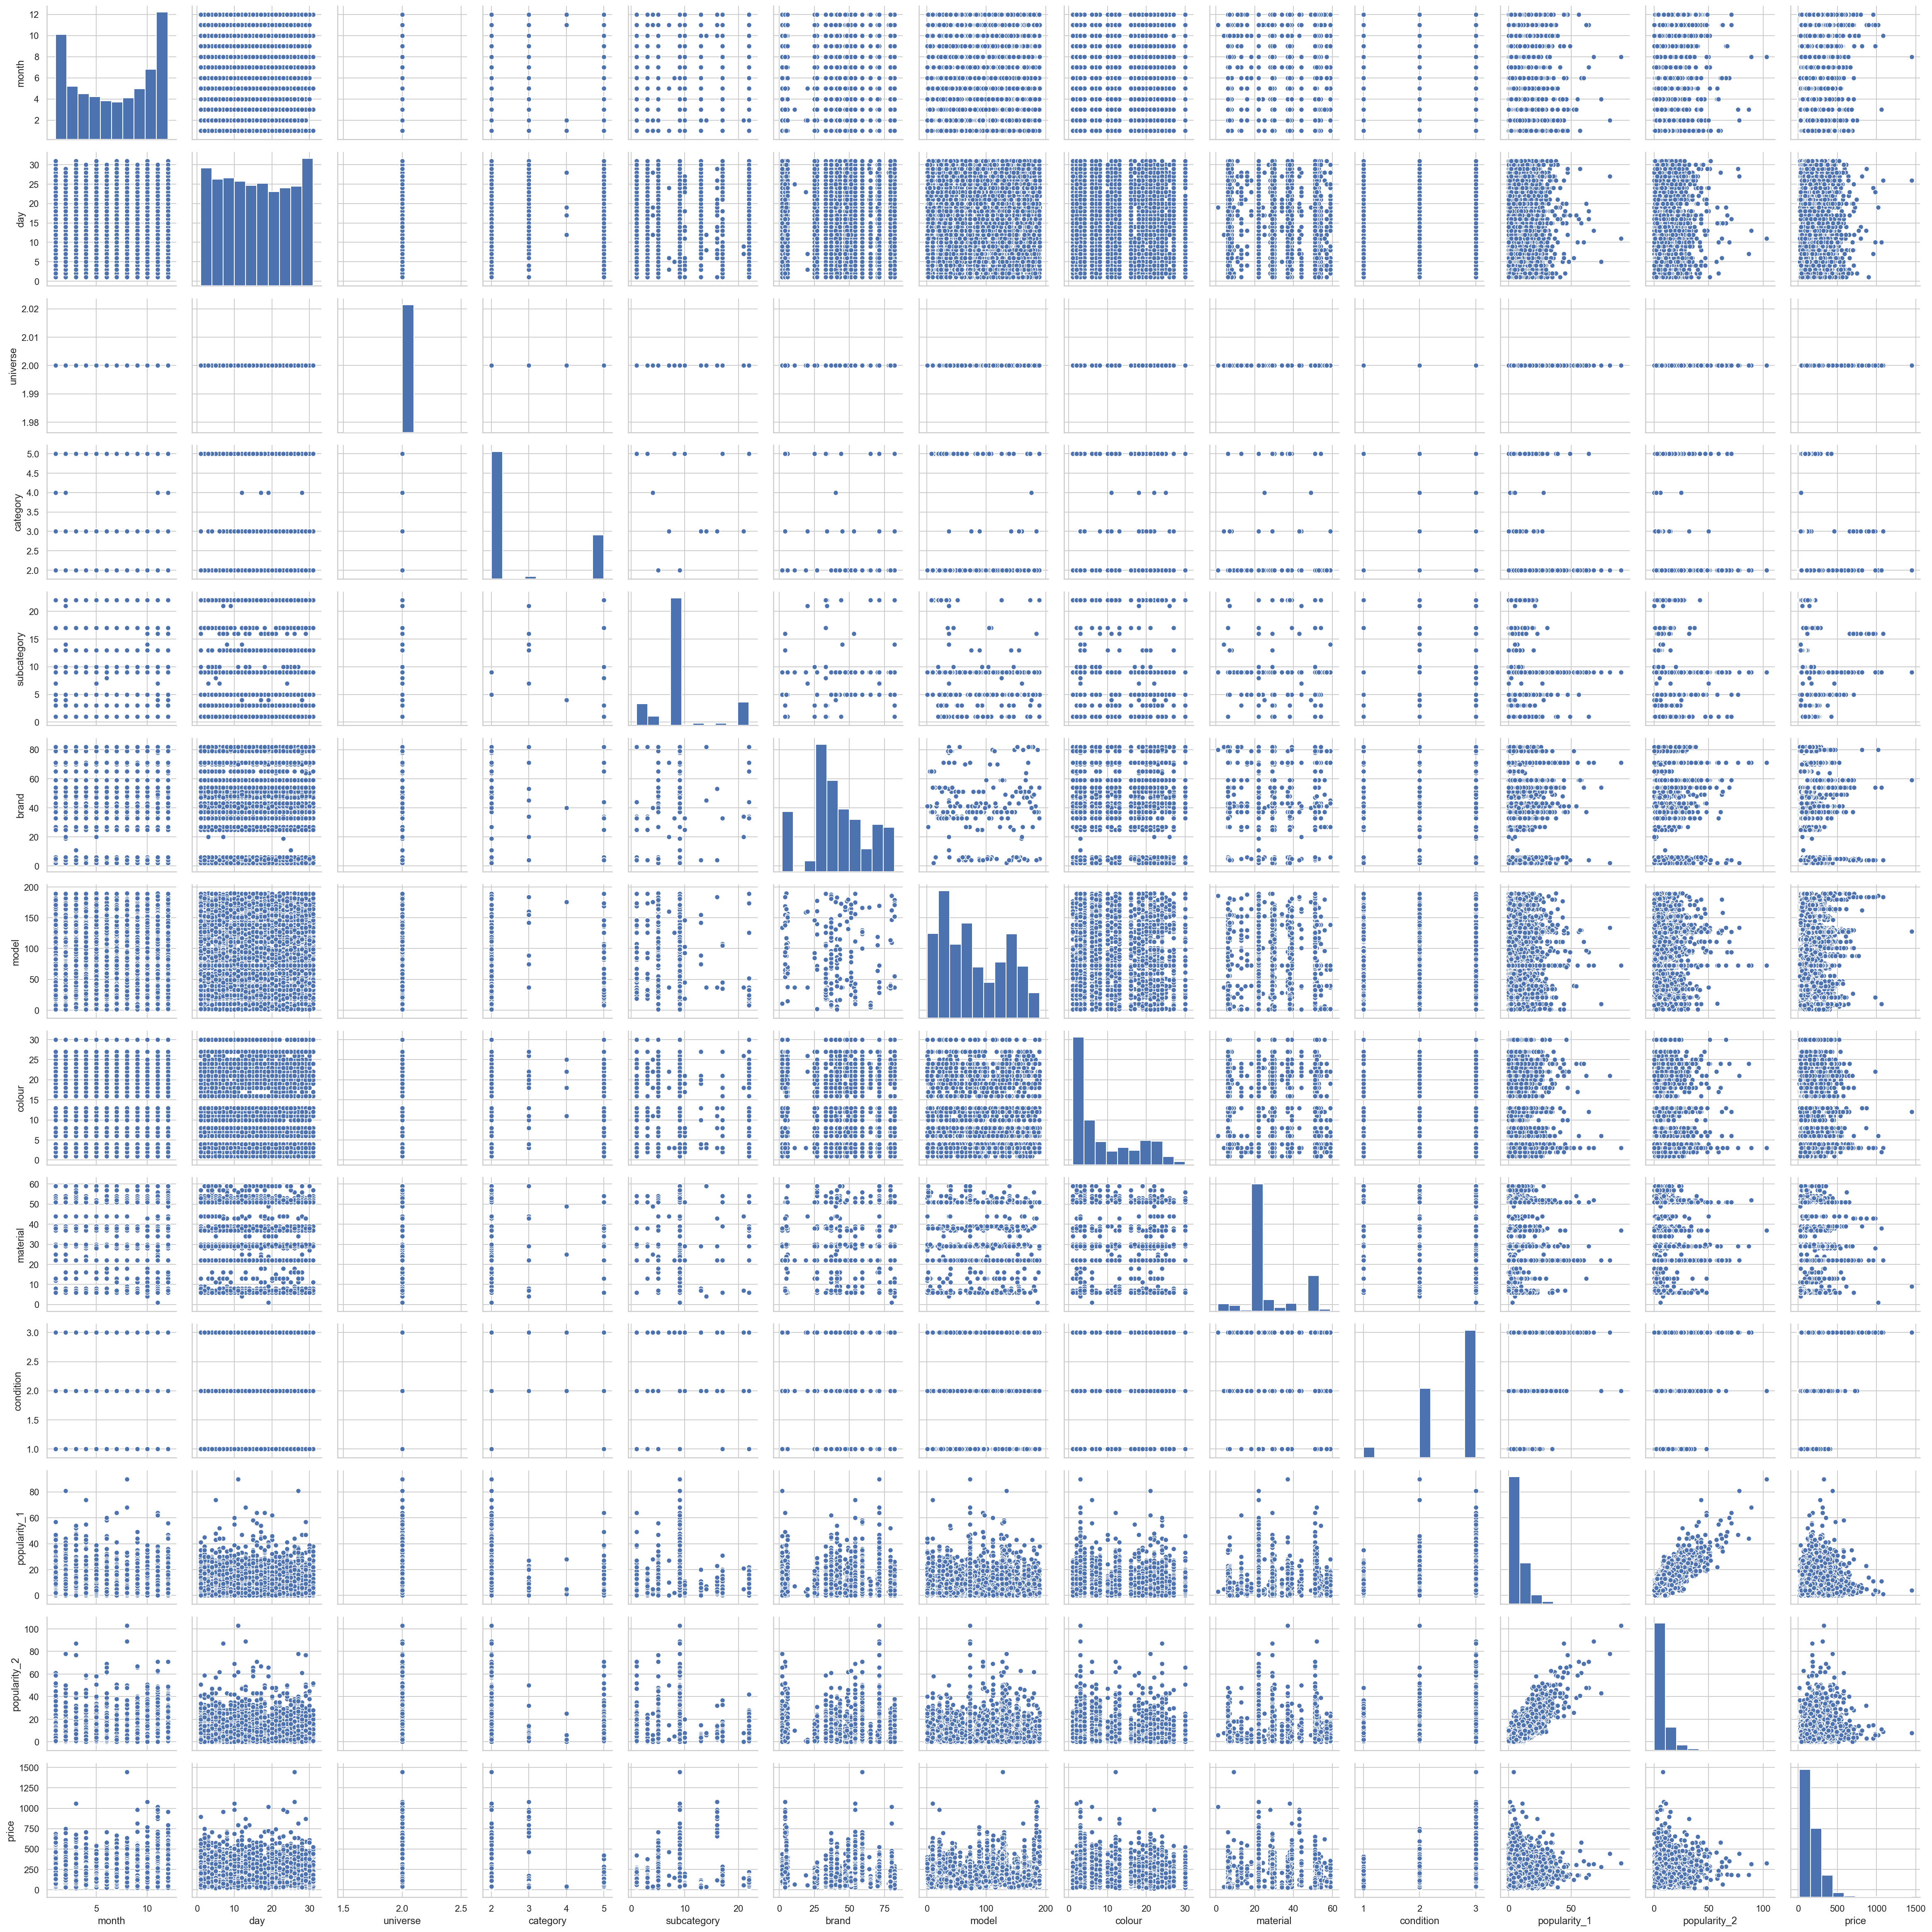

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')   #style控制默认样式,context控制着默认的画幅大小
cols = ['month','day','universe','category','subcategory','brand','model','colour','material','condition','popularity_1','popularity_2','price']
sns.pairplot(df2[cols], height=2.5)
plt.tight_layout()
plt.show()

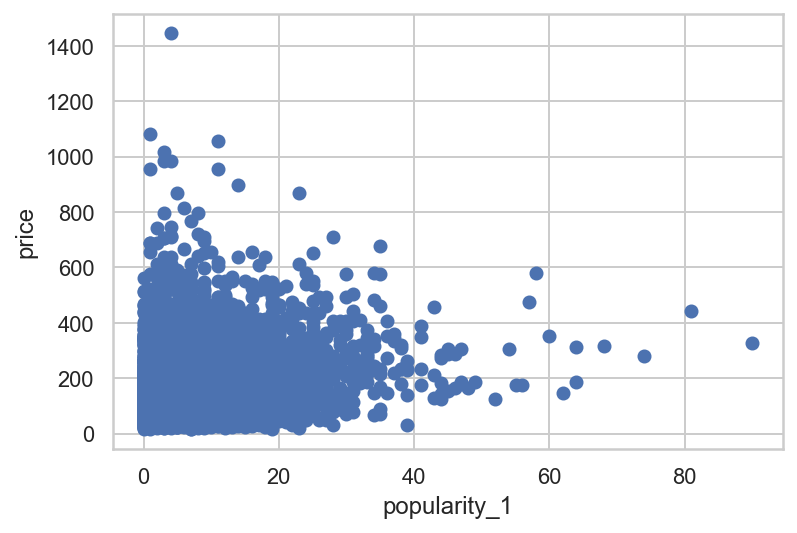

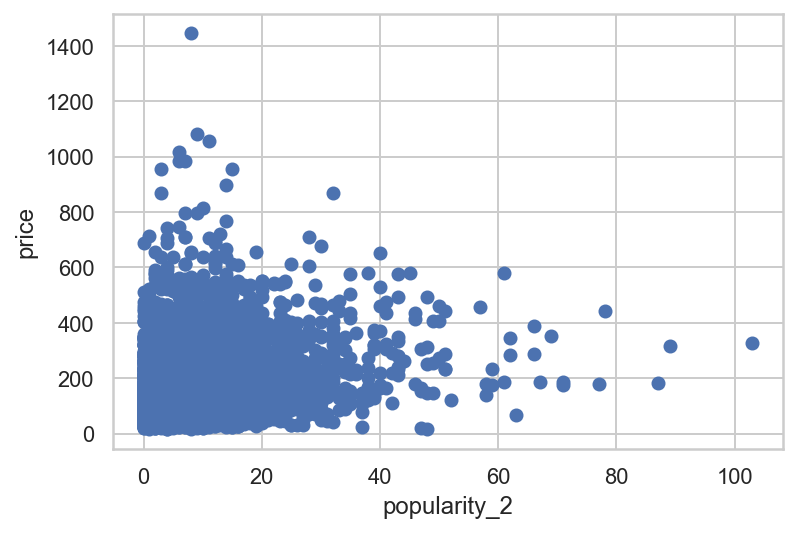

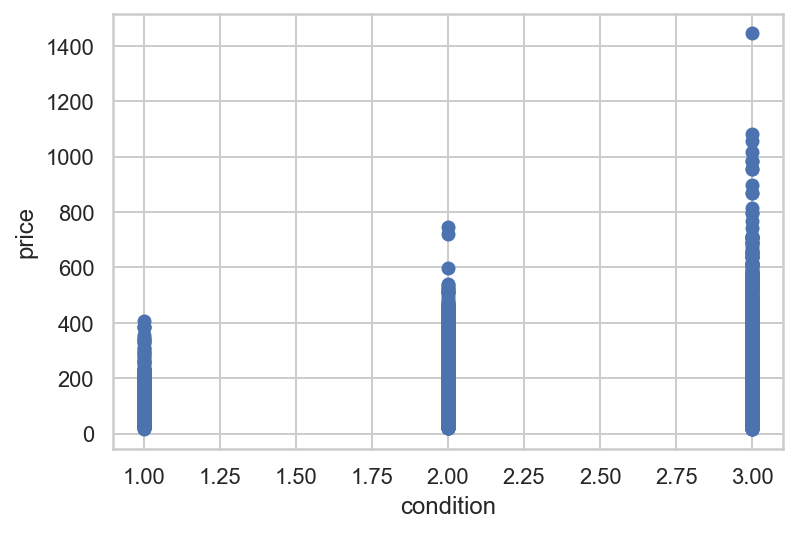

D:\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


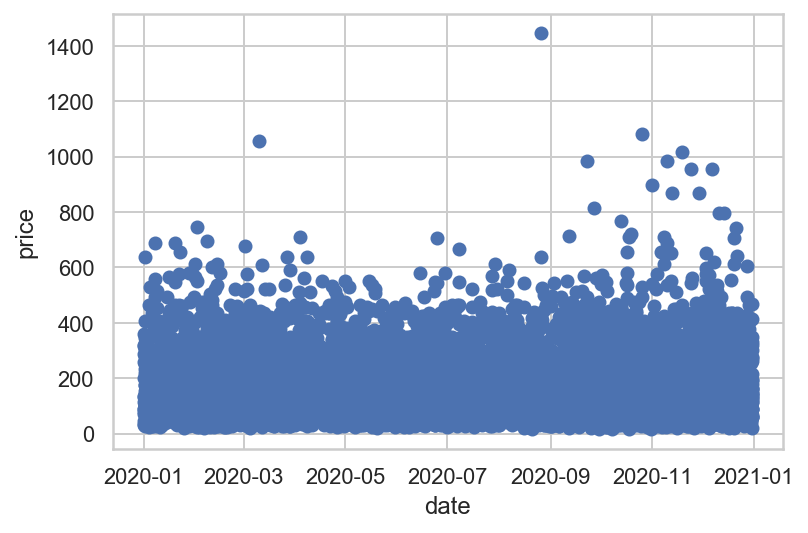

'\ndraw(popularity_1,price)\ndraw(popularity_2,price)\ndraw(condition,price)\ndraw(date,price)\n'

In [12]:
#Analyse relationship with the target
price = df2['price']
popularity_1 = df2['popularity_1']
popularity_2 = df2['popularity_2']
condition = df2['condition']
date = df2['date']

import matplotlib.pyplot as plt

plt.plot(popularity_1,price,'o')
plt.xlabel('popularity_1')
plt.ylabel('price')
plt.show()

plt.plot(popularity_2,price,'o')
plt.xlabel('popularity_2')
plt.ylabel('price')
plt.show()

plt.plot(condition,price,'o')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

plt.plot(date,price,'o')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

'''
draw(popularity_1,price)
draw(popularity_2,price)
draw(condition,price)
draw(date,price)
'''

In [13]:
data.groupby(['brand']).median()['price'].sort_values(ascending=False).values.std() #Calculate the standard deviation of the median set of different brands

41.14246510458137

Text(0.5, 1.0, 'Median price of various brands')

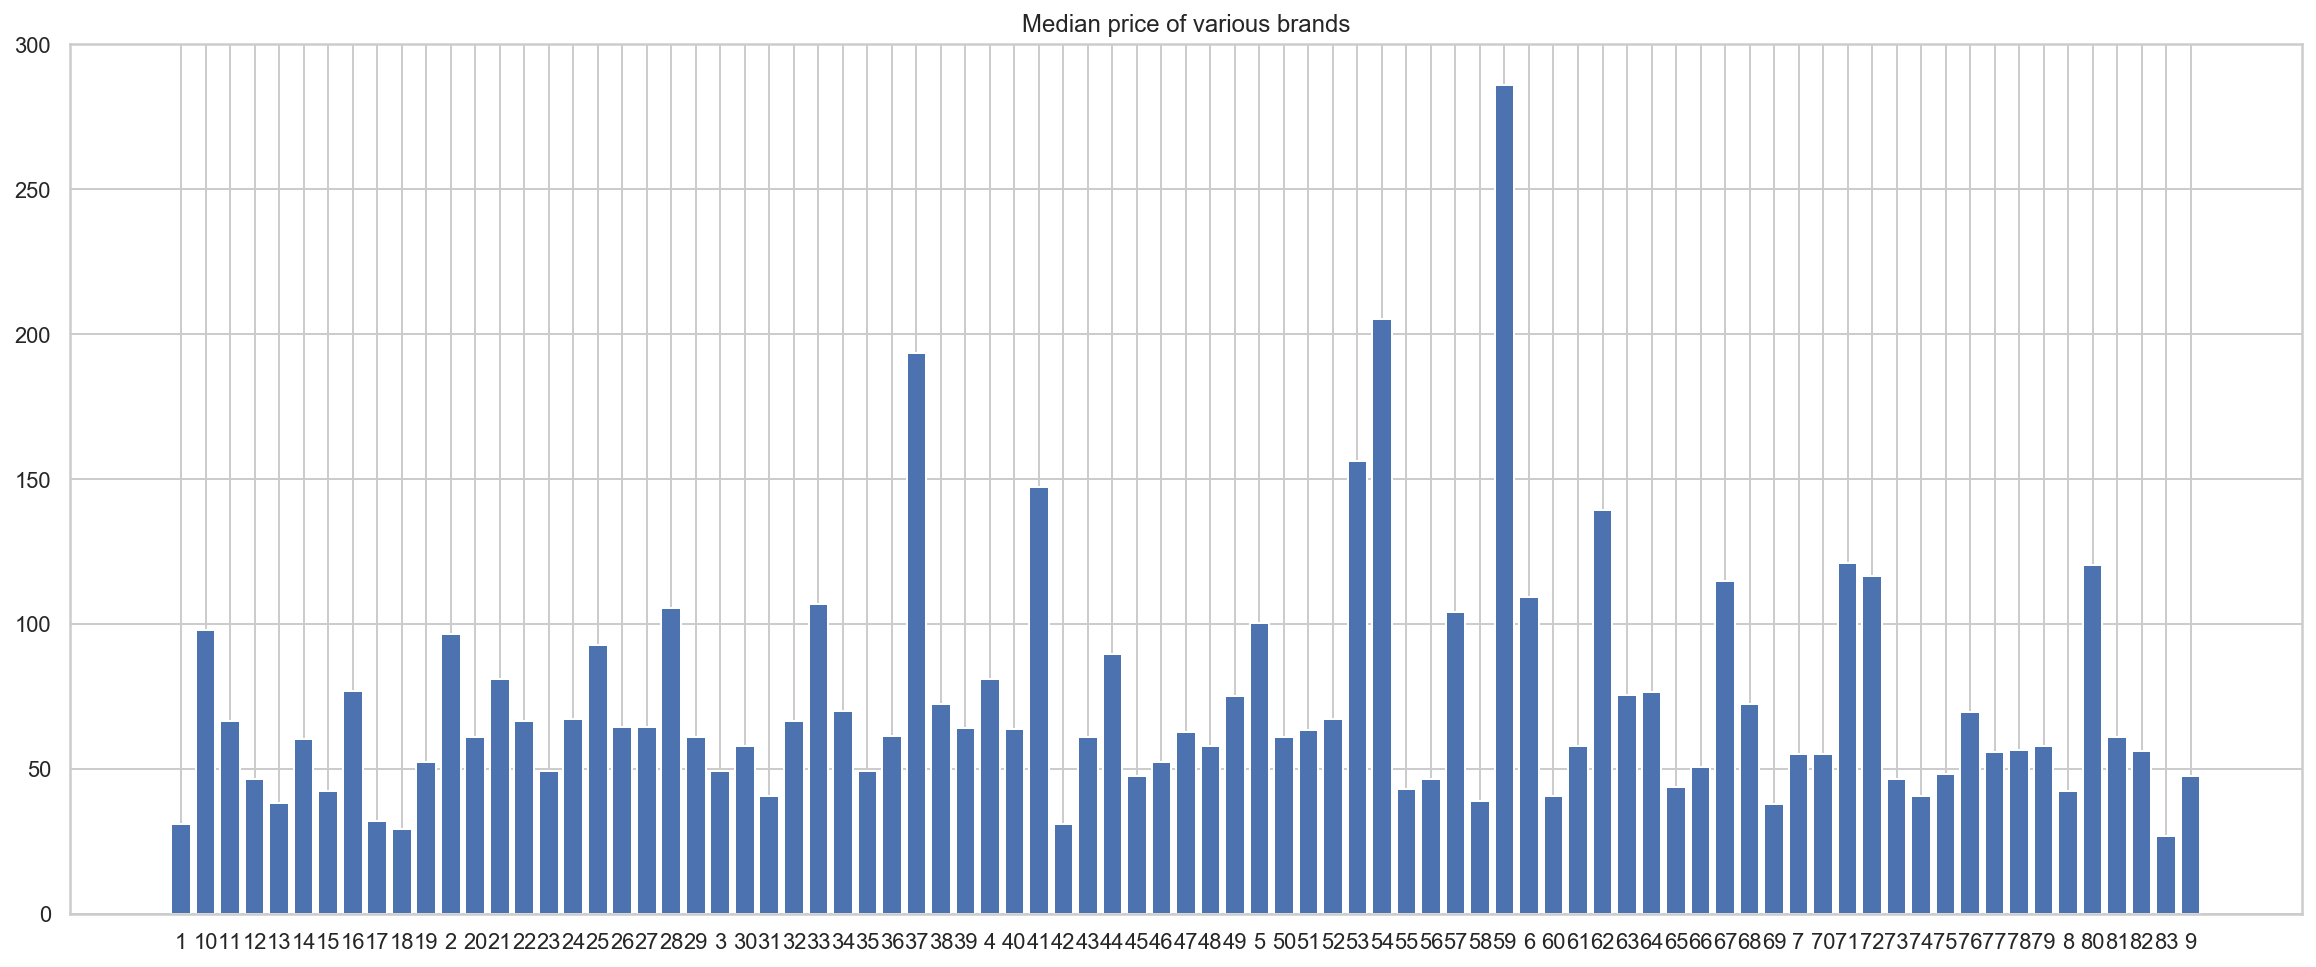

In [14]:
bar_plt=data.groupby(['brand']).median()['price']

fig,axes=plt.subplots(figsize=(20,8))
axes.bar(bar_plt.index,bar_plt.values)
axes.set_title('Median price of various brands')

In [15]:
data.groupby(['category']).median()['price'].sort_values(ascending=False).values.std() #Calculate the standard deviation of different category median sets

23.08993079244717

Text(0.5, 1.0, 'Median price of various categories')

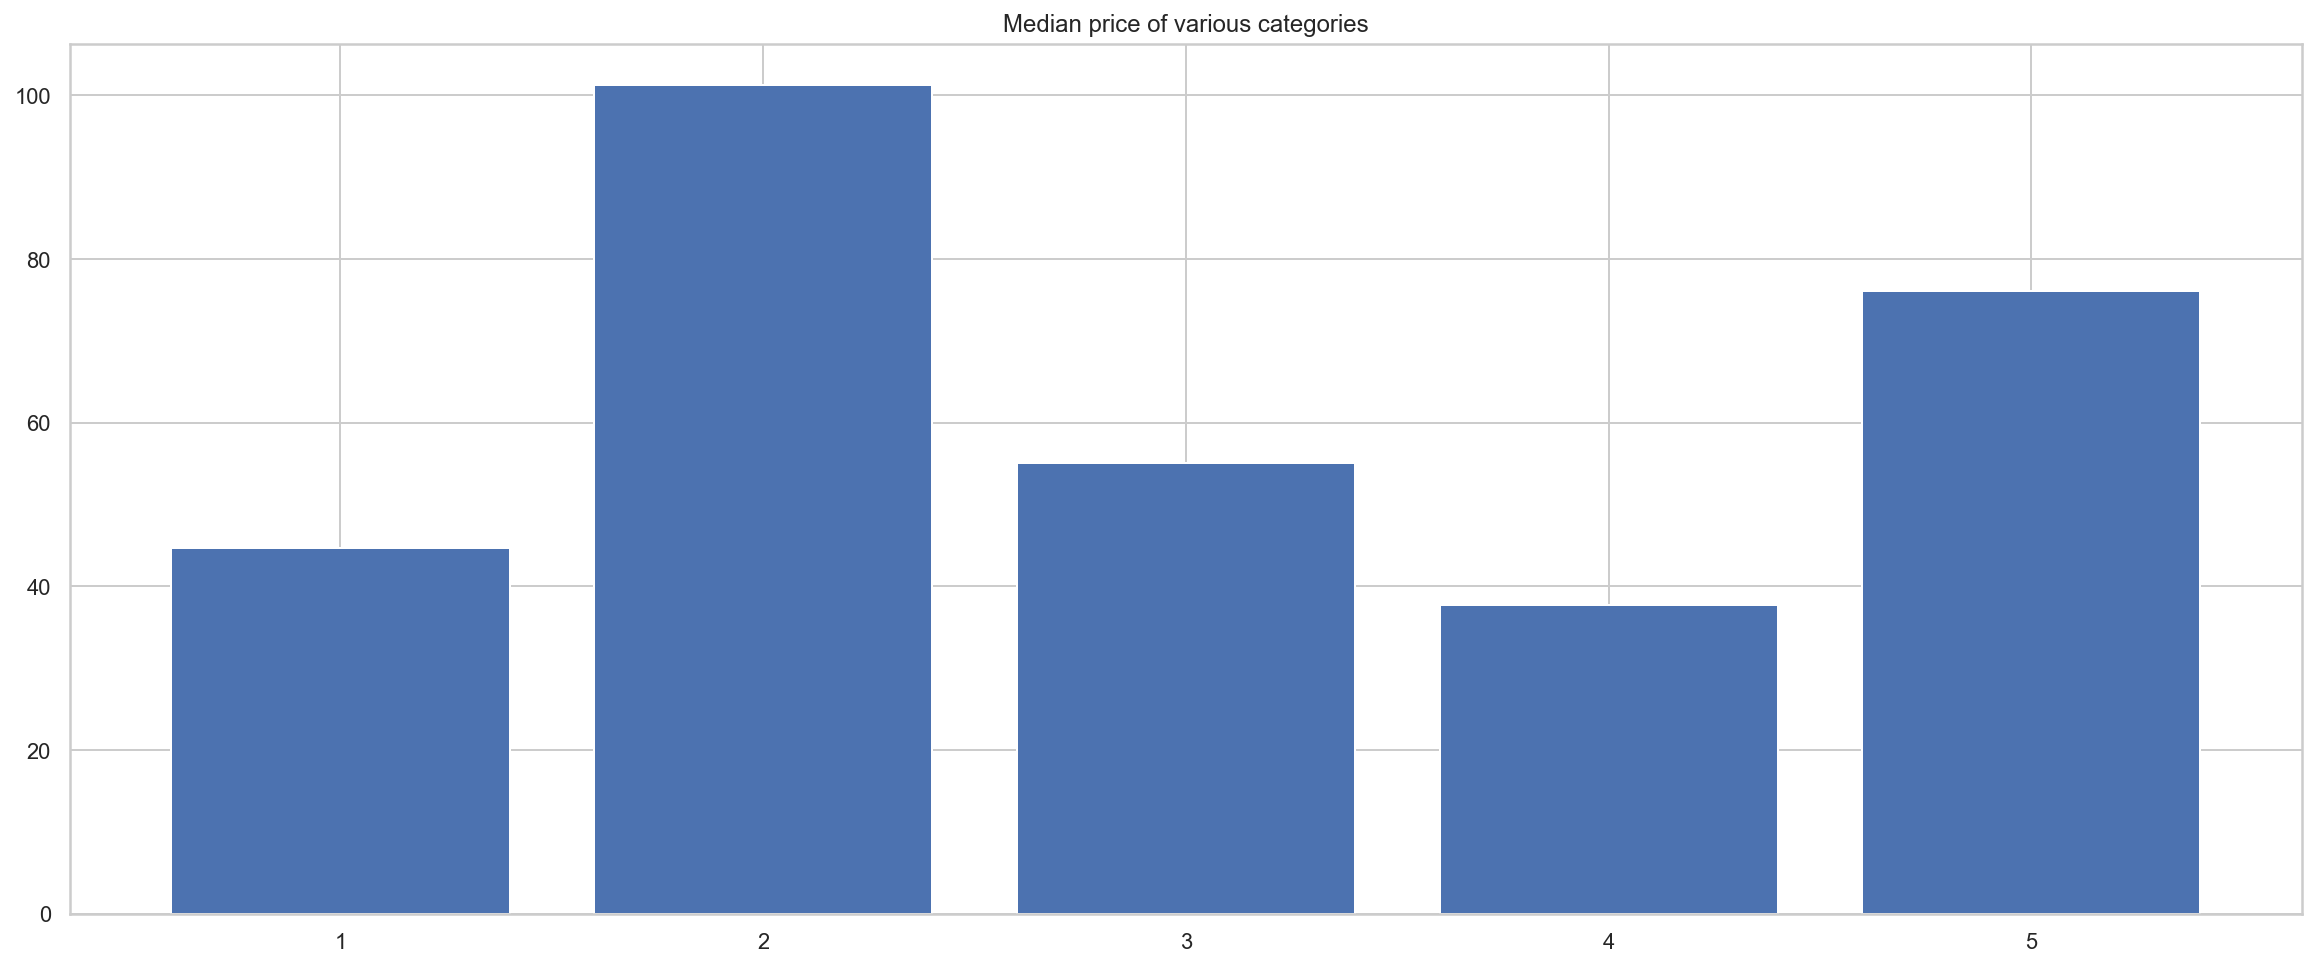

In [16]:
bar_plt=data.groupby(['category']).median()['price']

fig,axes=plt.subplots(figsize=(20,8))
axes.bar(bar_plt.index,bar_plt.values)
axes.set_title('Median price of various categories')

In [17]:
data.groupby(['model']).median()['price'].sort_values(ascending=False).values.std() #Calculate the standard deviation of the median set of different models

109.30488778371245

Text(0.5, 1.0, 'Median price of various models')

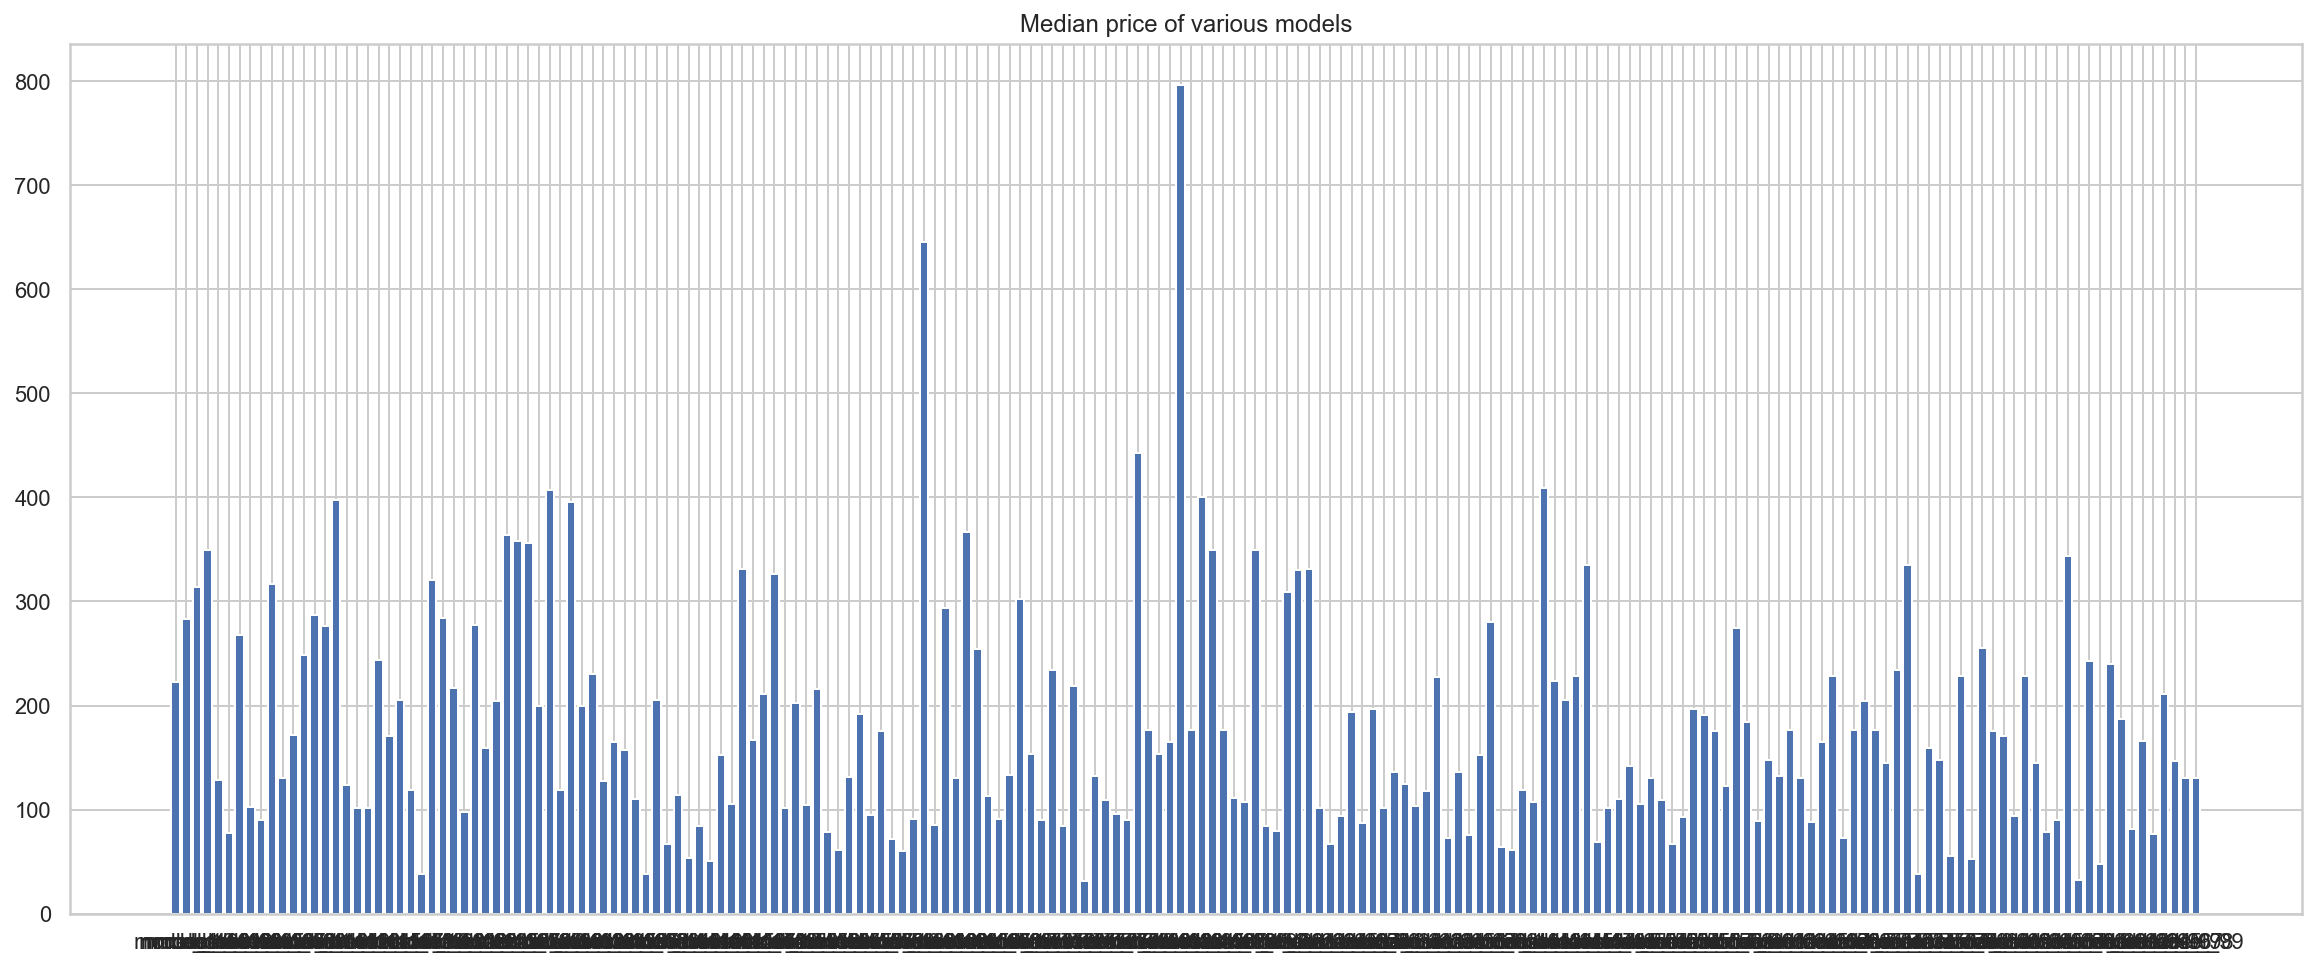

In [18]:
bar_plt=data.groupby(['model']).median()['price']

fig,axes=plt.subplots(figsize=(20,8))
axes.bar(bar_plt.index,bar_plt.values)
axes.set_title('Median price of various models')

In [19]:
data.groupby(['colour']).median()['price'].sort_values(ascending=False).values.std() #Calculate the standard deviation of the median set of different colours

17.974096114655914

Text(0.5, 1.0, 'Median price of various colours')

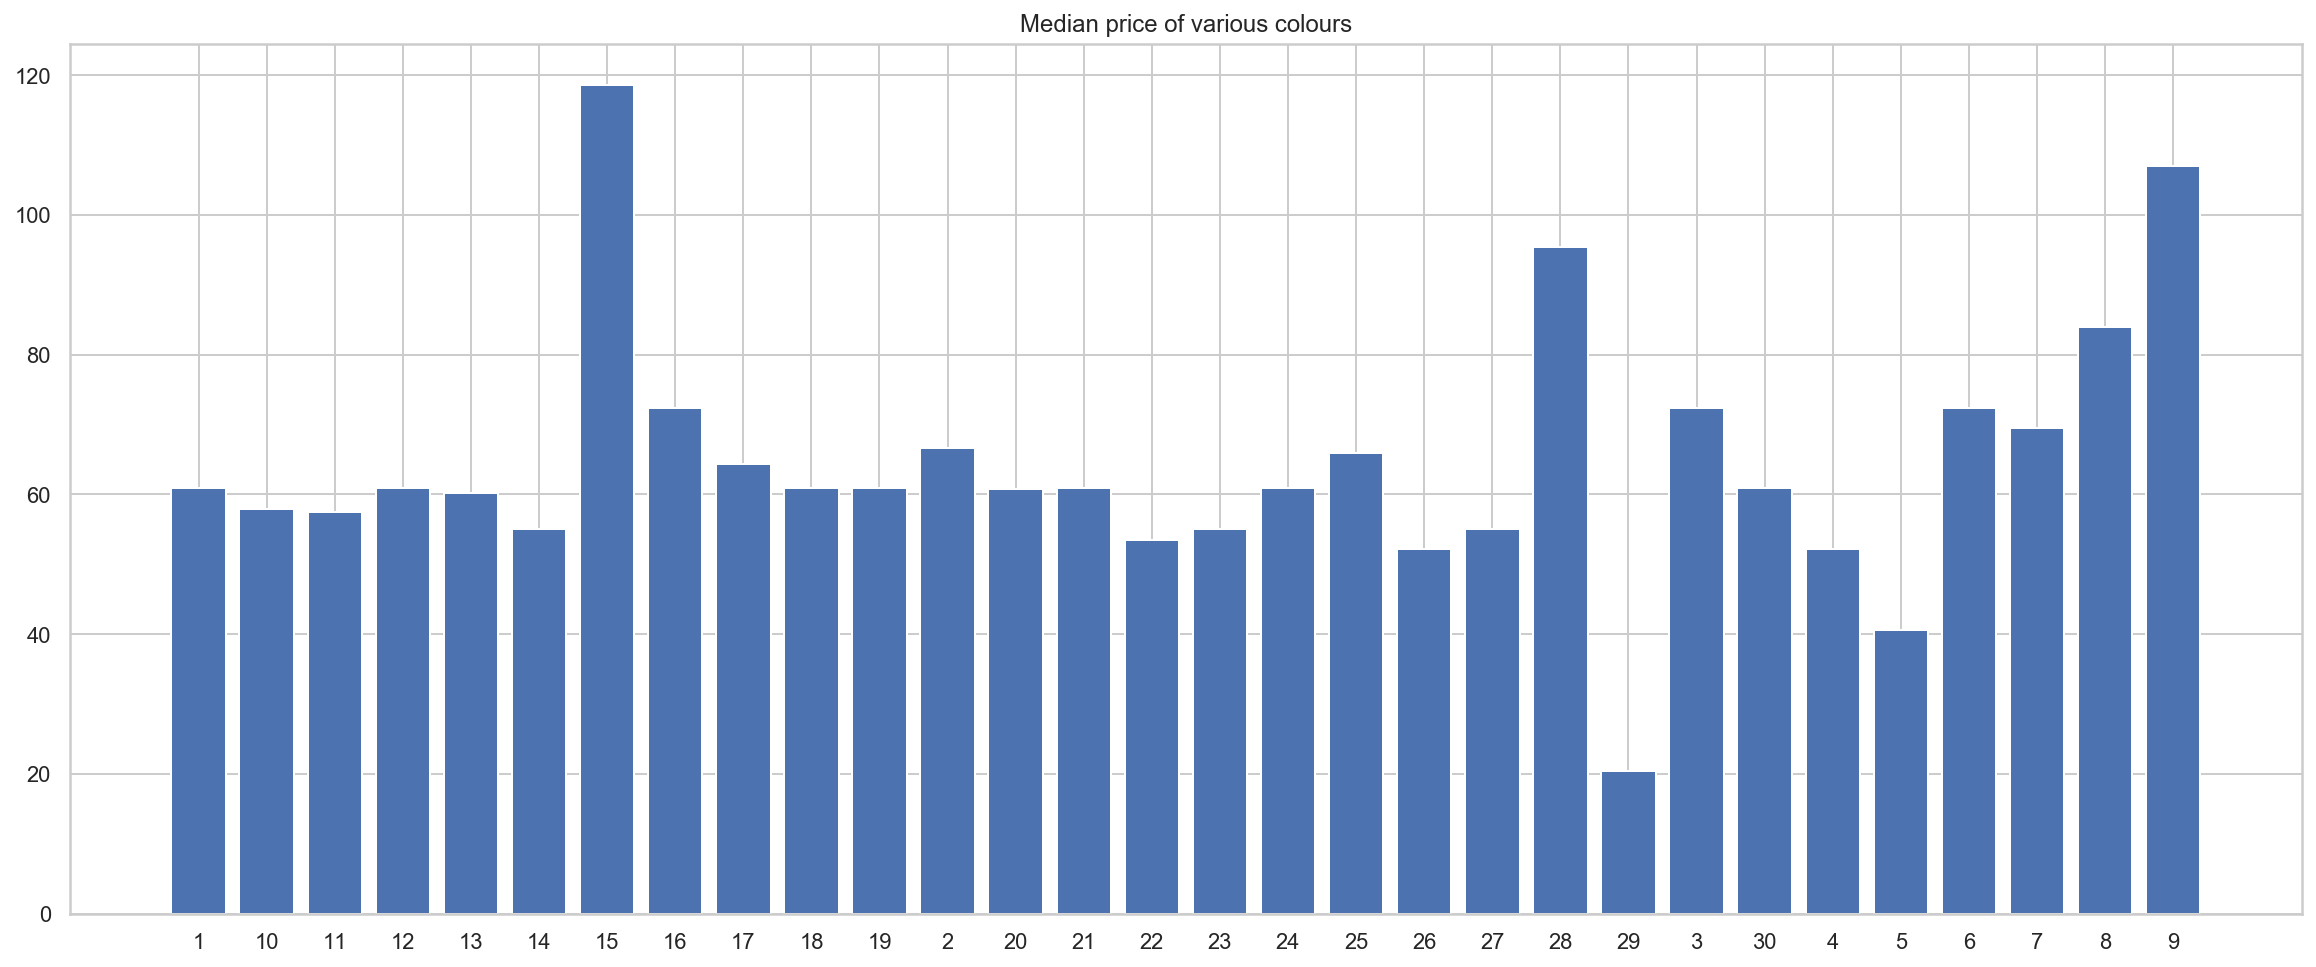

In [20]:
bar_plt=data.groupby(['colour']).median()['price']

fig,axes=plt.subplots(figsize=(20,8))
axes.bar(bar_plt.index,bar_plt.values)
axes.set_title('Median price of various colours')

In [21]:
data.groupby(['material']).median()['price'].sort_values(ascending=False).values.std() #Calculate the standard deviation of the median set of different materials

63.676008910778606

Text(0.5, 1.0, 'Median price of various materials')

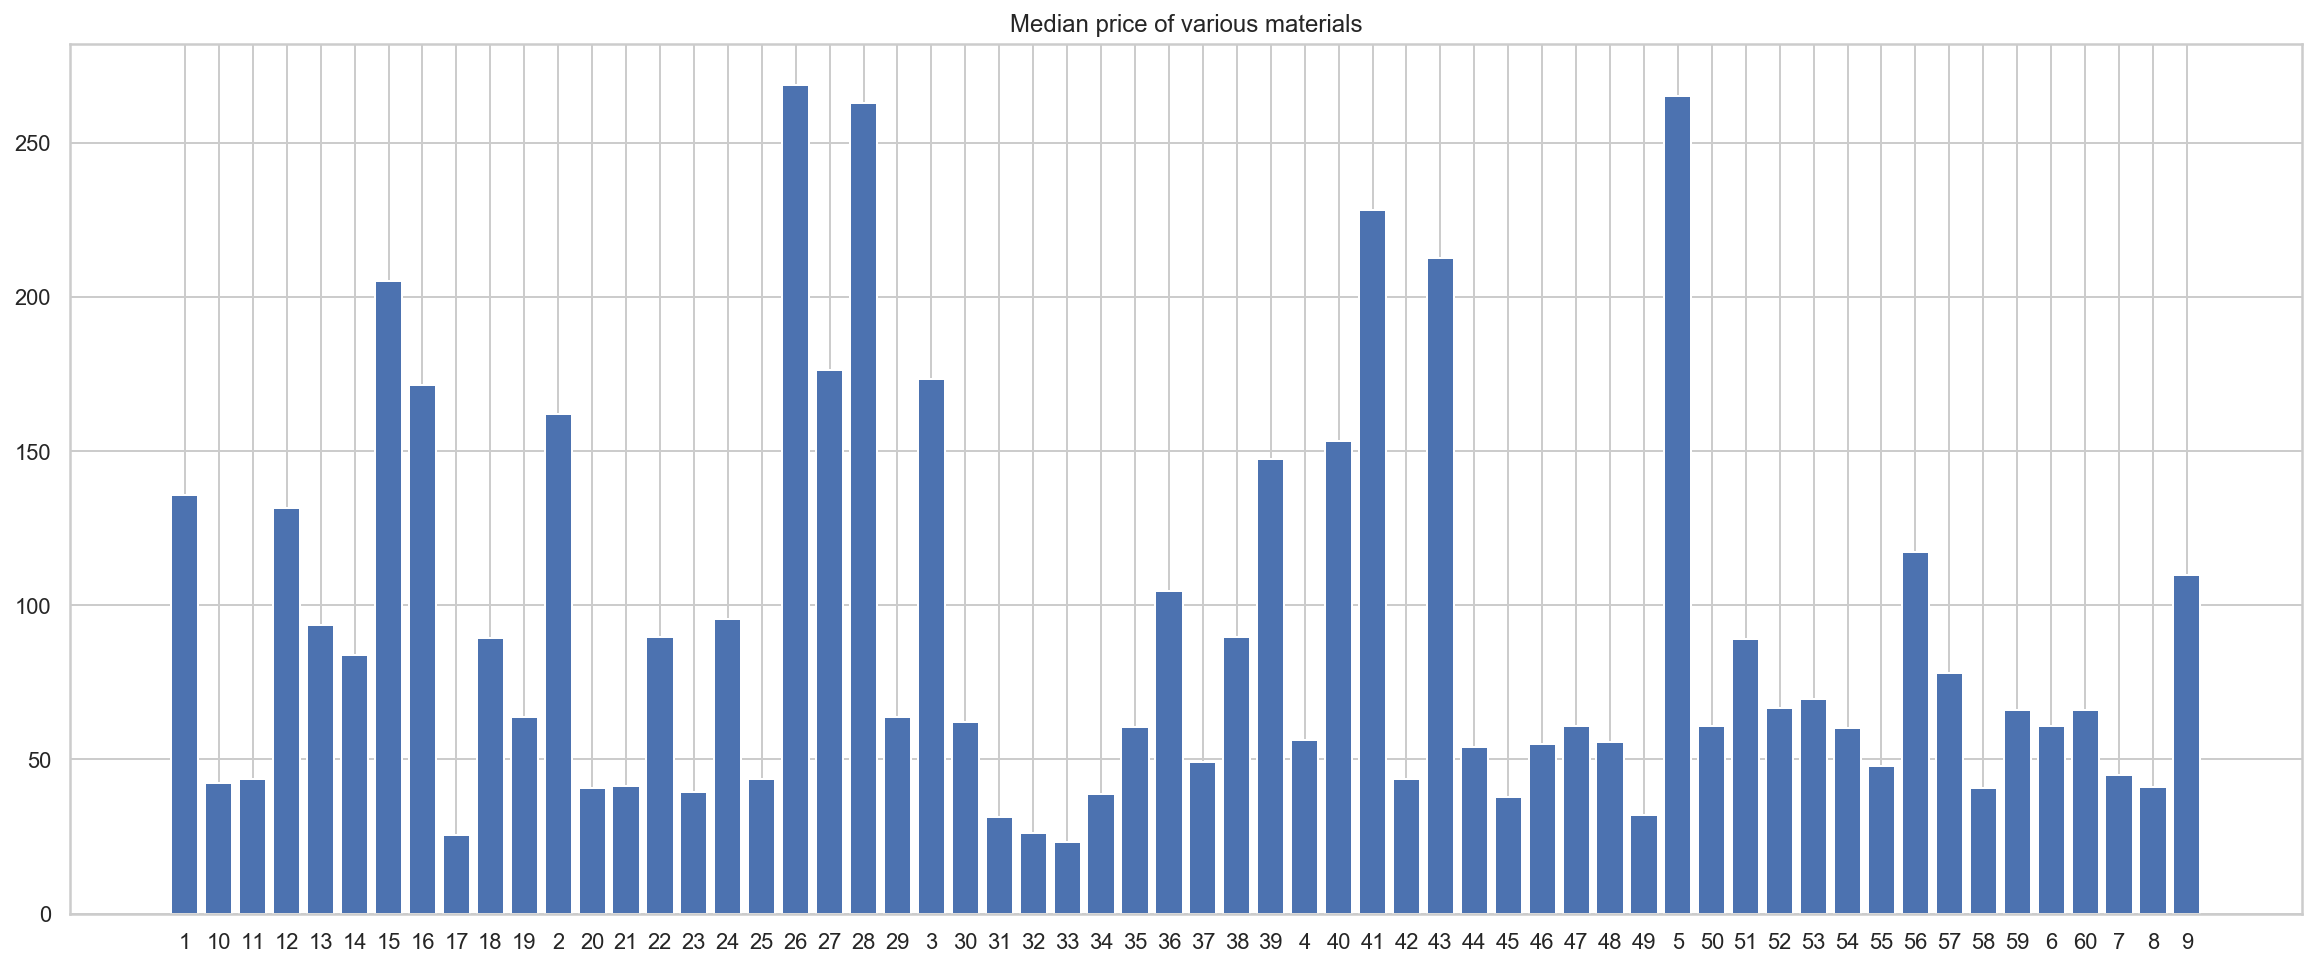

In [22]:
bar_plt=data.groupby(['material']).median()['price']

fig,axes=plt.subplots(figsize=(20,8))
axes.bar(bar_plt.index,bar_plt.values)
axes.set_title('Median price of various materials')

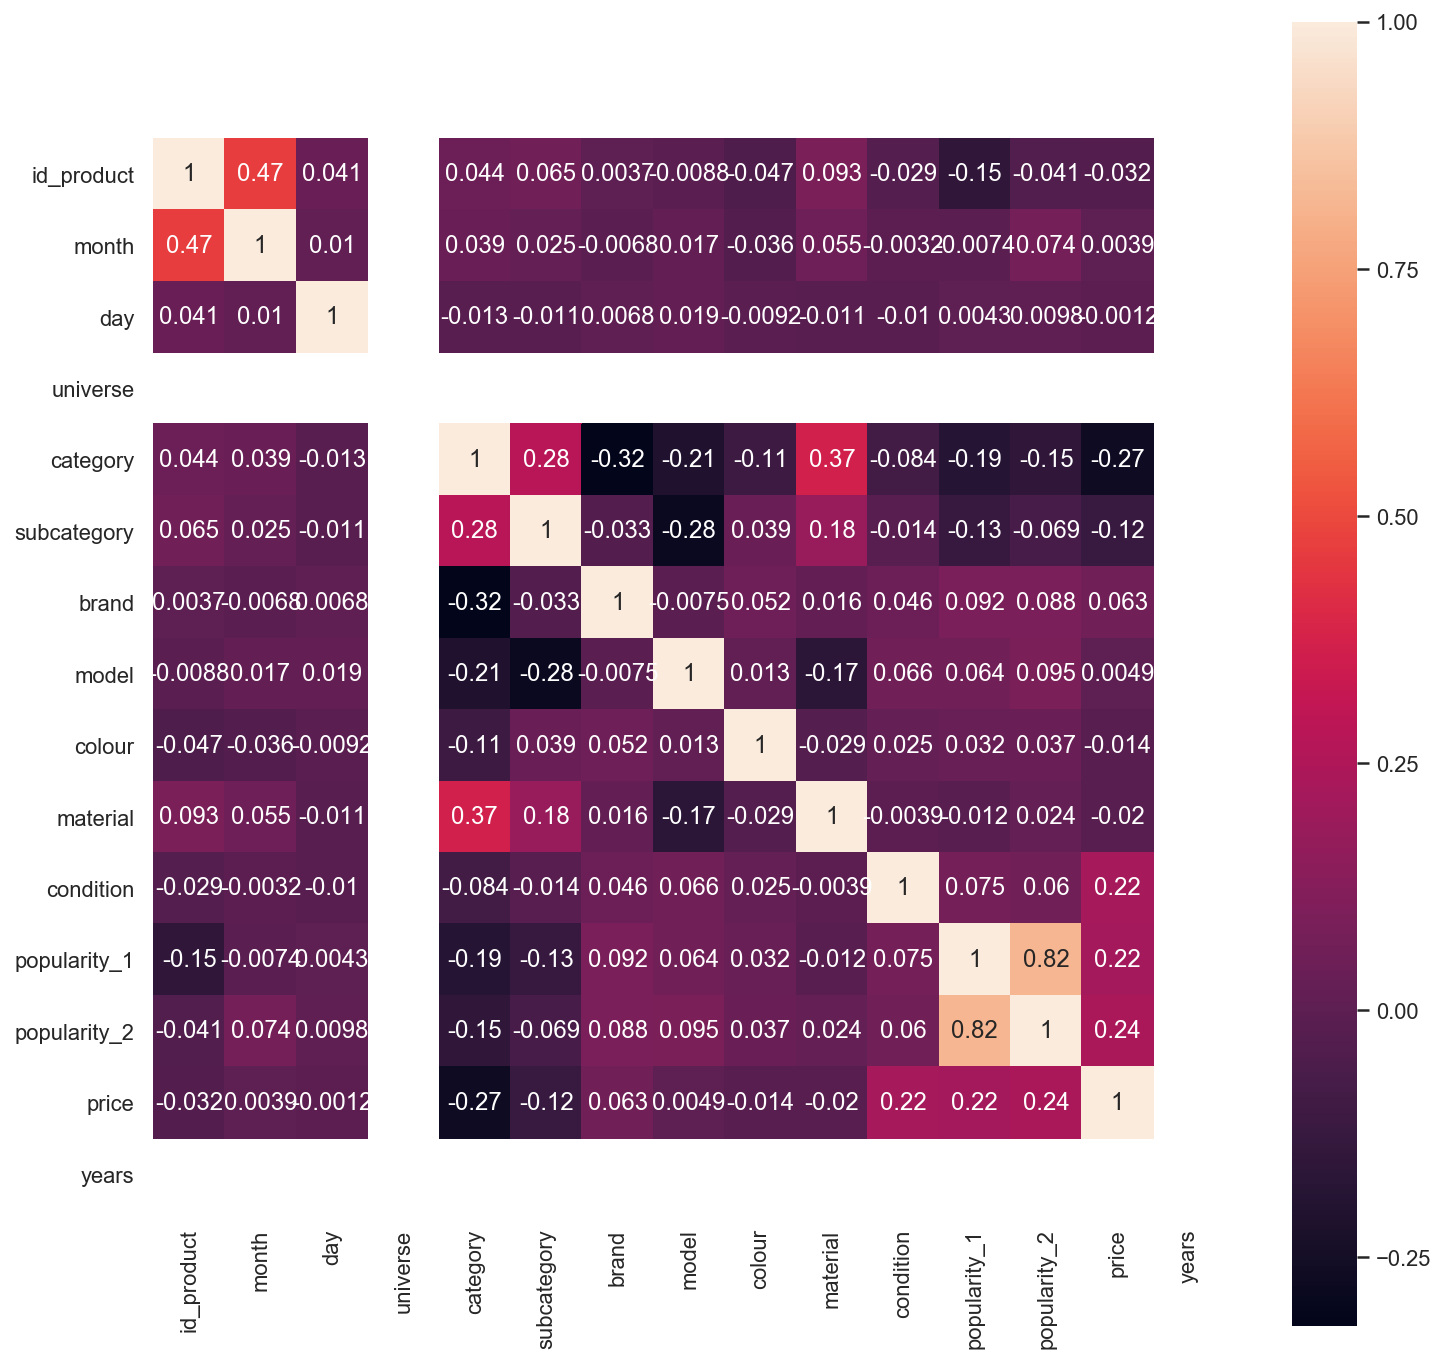

In [23]:
import seaborn as sns

fig=plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(),vmax=1,square=True,annot=True)

In [24]:
df3 = df2.drop(['id_product','day', 'month','years','date','colour','subcategory','universe','category','popularity_2'], axis=1)
df3

brand  model  material  condition  popularity_1   price
2          37     27        22          1           7.0   89.69
27         33     50        22          2           5.0  131.81
42         37    135         6          3          11.0   72.38
55         54    175        22          2           1.0  337.72
59         33     59        22          3           5.0  118.54
72         33     24        51          2           2.0   91.01
127        82    152        22          2          12.0  118.54
137        54    189        22          2           8.0  462.77
164        33     18        38          3           5.0  132.39
188        59    130        22          2           4.0  248.37
253        43     83        22          2           4.0   75.27
327        33    189        51          3           4.0   82.19
378        71     73         6          3           7.0  205.09
443        37     27        22          3           7.0  297.41
483        79     40        22          3           5.0   98.35
522        33     33        22          2           3.0  131.23
531        33     24        22          3           6.0   98.35
540        33     33        51          2           4.0  125.39
551        71     73         7          3          16.0  205.09
558        79     40         6          2           5.0   40.65
577        43    139        37          2           2.0   31.99
604        43    154        22          3          17.0   84.25
611        27      2        22          3           2.0   81.04
613        33     19        22          3           1.0  158.93
621        41     69        22          2           4.0   57.21
636        33     59        51          3           3.0  118.54
643        82    171        30          3           7.0  125.05
652        43    139         6          2          19.0   27.13
673        37     27        22          2           5.0  147.39
687        54     10        22          2          10.0  233.94
...       ...    ...       ...        ...           ...     ...
149394     54     10        38          3           1.0  374.90
149395     33    189        51          2           2.0  111.29
149402     70     64        22          3           9.0   48.15
149412     54     21        22          2           2.0  214.16
149422     33    126        51          3          16.0  145.09
149423     54     10        22          3           2.0  253.23
149425      6     38        22          2           3.0  192.40
149435     33     45        22          3           2.0  178.88
149503     33     33        29          2           7.0   78.15
149512     33     33        29          2           6.0   89.69
149549     33     33        51          3           9.0  144.51
149657     41     81        22          2           2.0  164.70
149664      4     94        22          2           9.0  219.44
149679     37    181        39          3           9.0  383.96
149695     43     83        22          2           2.0  182.01
149700     43     83        22          3           2.0  130.08
149749     33     29        22          2           0.0  129.50
149750     71     73        37          3          17.0  285.87
149778     82    171        22          3           9.0  184.90
149806     54     31        22          3           2.0  262.79
149814     54    112        22          2           0.0  386.85
149834     33     33        51          3           2.0  124.31
149835     82    152        22          3           4.0  147.97
149918     79     40        22          3           4.0   42.38
149933     41     39        53          2           6.0  202.21
149935     40     98        22          3           8.0  156.05
149947     33    126        22          3          13.0  135.43
149950     33     59        51          2           5.0   92.58
149959     33     59        22          2           4.0   89.69
149982     43     99        22          2          10.0  112.77

[8619 rows x 6 columns]

In [25]:
df3.describe()

brand        model     material    condition  popularity_1  \
count  8619.000000  8619.000000  8619.000000  8619.000000   8619.000000   
mean     42.373825    78.976215    27.698805     2.566307      7.083652   
std      20.779382    53.962037    12.708845     0.587332      6.820466   
min       2.000000     1.000000     1.000000     1.000000      0.000000   
25%      33.000000    33.000000    22.000000     2.000000      3.000000   
50%      41.000000    73.000000    22.000000     3.000000      5.000000   
75%      54.000000   130.000000    29.000000     3.000000      9.000000   
max      82.000000   190.000000    59.000000     3.000000     90.000000   

             price  
count  8619.000000  
mean    171.891958  
std     115.453561  
min      16.990000  
25%      89.690000  
50%     139.130000  
75%     231.060000  
max    1445.640000

In [26]:
to_model=pd.get_dummies(df3)#One-hot encoding of non-numeric data
prices = df3['price']
features = df3.drop('price', axis = 1)

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=10)
print(features.shape)
print(X_train.shape)
print(X_test.shape)

(8619, 5)
(6895, 5)
(1724, 5)


In [28]:
# Import mean_squared_log_error
from sklearn.metrics import mean_squared_log_error

def performance_metric(y_true, y_predict):
    
    score = mean_squared_log_error(y_true,y_predict)

    return score

In [29]:
# Import 'make_scorer', 'DecisionTreeRegressor', 'GridSearchCV' and 'KFold'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold



def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cross_validator = KFold(n_splits=10)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=1)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[i for i in range(1, 11)]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cross_validator' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cross_validator)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    print(pd.DataFrame(grid.cv_results_))
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [30]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002938      0.001647         0.000704        0.000461   
1       0.002206      0.001164         0.000595        0.000486   
2       0.002812      0.005666         0.001566        0.004698   
3       0.006248      0.007653         0.000000        0.000000   
4       0.004690      0.007164         0.000650        0.001951   
5       0.003980      0.006347         0.001562        0.004686   
6       0.005854      0.004461         0.000804        0.002412   
7       0.005442      0.004512         0.001417        0.002388   
8       0.006049      0.004229         0.001206        0.002406   
9       0.007071      0.003854         0.001008        0.002422   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.416731           0.396879   
1               2   {'max_depth': 2}           0.332422           0.323166   
2               3   {'max_de

In [31]:
depth = 1
regressor = DecisionTreeRegressor(max_depth = depth)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance_metric(y_test, y_pred)
print("The mean_squared_log_error is ",score)


The mean_squared_log_error is  0.47204686137769125


In [32]:
# Produce a matrix for product
product_data = [[3,10,3,1,3],
                [80,180,50,3,90],
                [40,90,25,2,50]] 
 
# Show predictions
predicted_price = reg.predict(product_data)
for i, price in enumerate(predicted_price):
    print("Predicted selling price for produit {}: €{:,.2f}".format(i+1, price))

Predicted selling price for produit 1: €146.98
Predicted selling price for produit 2: €229.11
Predicted selling price for produit 3: €146.98


In [33]:
X = df3[['brand','model','material','condition','popularity_1']].values
y = df3['price'].values

In [34]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [35]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 139.13
Baseline Performance on the test set: MAE = 86.3146


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# pull data into target (y) and predictors (X)
y_train = df3.price
predictor_cols = ['brand','model','material','condition','popularity_1']

# Create training predictors data
X_train = df3[predictor_cols]
# Create a random forest model
my_model = RandomForestRegressor()
# fit model
my_model.fit(X_train,y_train)


# Used to predict prices
X_test = df3[['brand','model','material','condition','popularity_1']].values
predicted_prices = my_model.predict(X_test)
print(predicted_prices)

my_submission = pd.DataFrame({'id_product': df.id_product, 'price': predicted_prices})

my_submission.to_csv('submission.csv', index=False)

[108.91920714 127.22555238 121.4845     ...  87.43974286 117.18492857
 135.466     ]


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
# mean_squared_log_error
print(metrics.mean_squared_log_error(predicted_prices, y_train))

0.06096183980637347


In [67]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [69]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the predicted set: MAE = %0.4f" % mae(y_pred, baseline_guess))

The baseline guess is a score of 139.13
Baseline Performance on the test set: MAE = 32.1497


In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor   
from sklearn.model_selection import cross_val_score    
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_log_error, r2_score  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [51]:
X = df3[['brand','model','material','condition','popularity_1']].values
y = df3['price'].values

# 设置交叉验证次数
n_folds = 5

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_log_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df3_score = pd.DataFrame(cv_score_list, index=model_names)
df3_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'msle', 'r2'])

# 各个交叉验证的结果
df3_score



D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

0         1         2         3         4
BayesianRidge     0.106767  0.080055  0.076943  0.089111  0.103103
LinearRegression  0.106798  0.079988  0.076987  0.089135  0.103109
ElasticNet        0.090885  0.066309  0.061244  0.072769  0.085011
SVR               0.070069  0.083811  0.061520  0.069726  0.077235
GBR               0.618232  0.644680  0.680508  0.641724  0.634929

In [52]:
df3_met

ev        mae      msle        r2
BayesianRidge     0.092101  81.654336  0.427903  0.092101
LinearRegression  0.092108  81.649109  0.427826  0.092108
ElasticNet        0.076144  82.778250  0.440095  0.076144
SVR               0.163463  73.635821  0.345782  0.108937
GBR               0.676019  45.526836  0.147079  0.676019

In [53]:
import numpy as np
from sklearn.datasets import make_regression
X, y = make_regression(1000, 2, noise=10)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr = GBR()
gbr.fit(X, y)
gbr_preds = gbr.predict(X)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr_preds = lr.predict(X)

In [56]:
gbr_residuals = y - gbr_preds
lr_residuals = y - lr_preds

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt

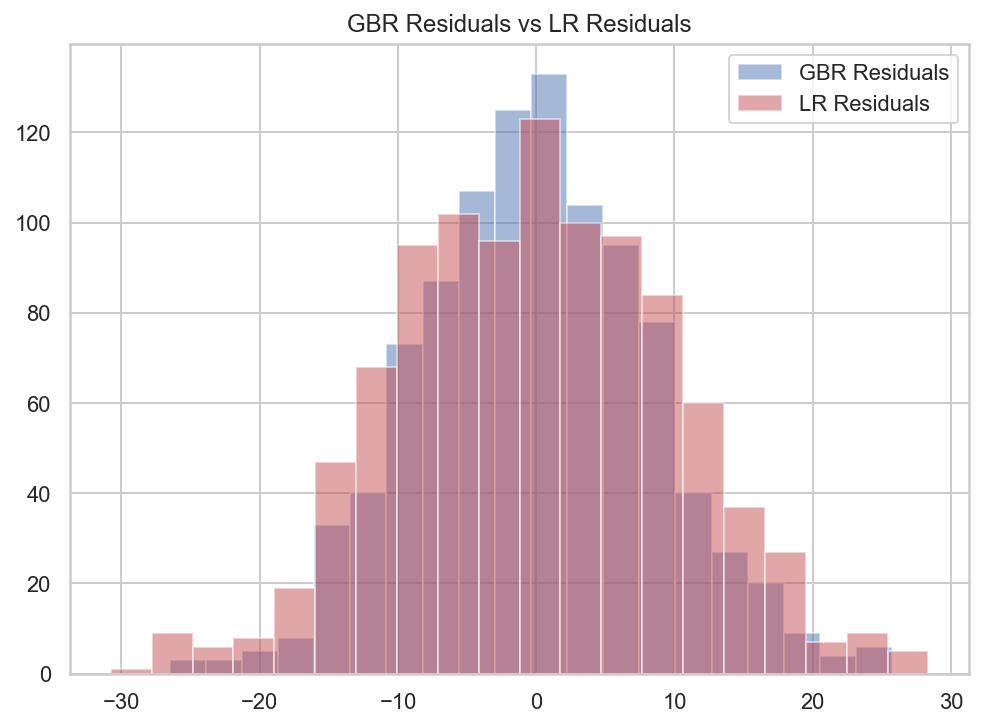

In [59]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(gbr_residuals,bins=20,label='GBR Residuals', color='b', alpha=.5);
ax.hist(lr_residuals,bins=20,label='LR Residuals', color='r', alpha=.5);
ax.set_title("GBR Residuals vs LR Residuals")
ax.legend(loc='best');

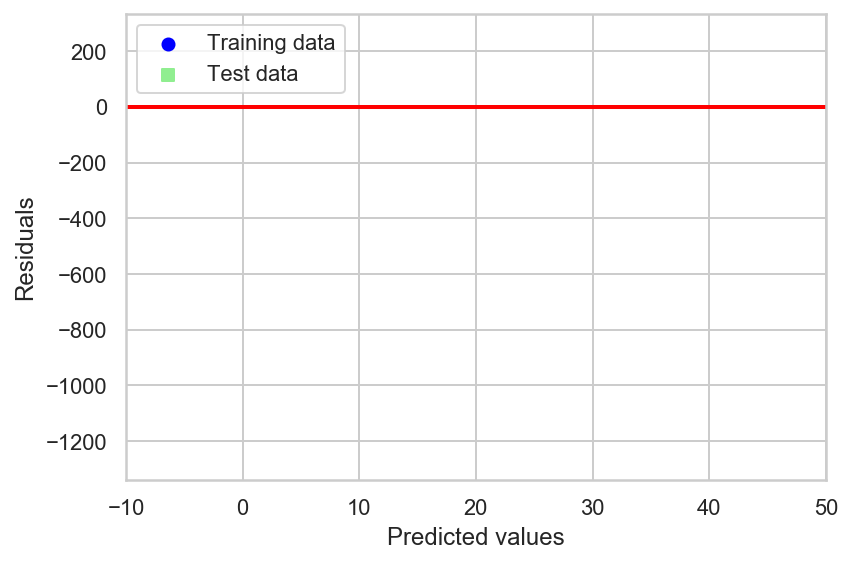

In [60]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

#评估回归模型的性能
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
 
X = df3.iloc[:, :-1].values   #除去最后一列,其余都作为特征考虑范围
y = df3['price'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
#预测值与偏差的关系
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error 
print('MSLE train: %.3f, test: %.3f' % (mean_squared_log_error (y_train, y_train_pred),mean_squared_log_error (y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


MSLE train: 0.424, test: 0.436
R^2 train: 0.090, test: 0.096


In [62]:
#添加正则化项
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)   #L1正则化系数
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)
print('MSLE train: %.3f, test: %.3f' % (mean_squared_log_error (y_train, y_train_pred),mean_squared_log_error (y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

[ 0.23866131 -0.04685517 -0.19967249 39.45451339  3.25452406]
MSLE train: 0.424, test: 0.436
R^2 train: 0.090, test: 0.096


MSLE train: 0.052, test: 0.134
R^2 train: 0.885, test: 0.670


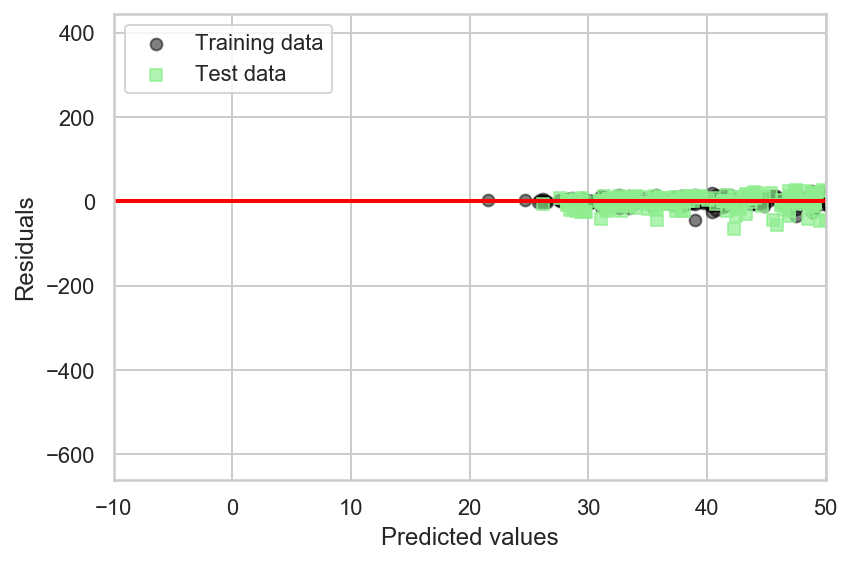

In [63]:
X = df3.iloc[:, :-1].values   #所有特征列
y = df3['price'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
 
print('MSLE train: %.3f, test: %.3f' % (mean_squared_log_error(y_train, y_train_pred),mean_squared_log_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


plt.scatter(y_train_pred, y_train_pred - y_train, c='black', marker='o', s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()